## Classification of movie reviews

In [1]:
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt

In [2]:
# Import Keras from Tensorflow
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

### IMDB Dataset from the Internet Movie Database

In what follows, we define the variables train_data and test_data which are lists of reviews; each review is a list of word indices (encoding a sequence of words). Then, train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive. 

In [3]:
# The IMDB dataset is a set of 50k highly polarized reviews from the Internet Movie Database. 

# They are split into 25k reviews for training and 25k for testing, each set consisting of 50% negative and 50% positive reviews. 
# num_words = 10k meams you're keeping the top 10k most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 


PREPARING THE DATA

We can't feed lists of integers into a neural network: we have to turn these lists into tensors. In what follows, we are going to vectorize those sequences through a vectorization function. 

In [4]:
def vectorize_sequences(sequences, dimension = 10000): # dimension = 10k as the num_words
    """
    This function performs a one-hot encoding of the 'sequences' list turning it into a vector of 0s and 1s. To be more concrete, this function
    turns the sequence [3, 5] into a 10.000-dimensional vector that would be all 0s except fot indices 3 and 5, which would be 1s.
    """
    results = np.zeros((len(sequences), dimension)) # creates an all-zero matrix of shape (len(sequences), dimension)
                       
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
                       
    return results

In [5]:
# Vectorization of both training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# Vectorization of labels (straightforward)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

BUILDING THE NEURAL NETWORK 

Input data are vectors, and the labels are scalars: a type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers with 'relu' activations.

In [7]:
# Defining a standard NN 
model = keras.Sequential()

In [8]:
# Giving a structure to the NN: we introduce three layers - the 1st layer of 16 neurons receiving 10k inputs, the 2ns of 16 neurons and the last 
# containing 1 neuron only. 
model.add(layers.Dense(16, input_shape = (10000,), activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [9]:
# Finally, we should choose a loss function and an optimizer. Because we're facing a binary classification problem and the output of our network is a
# probability, it's best to use the 'binary_crossentropy' loss (the best choice when dealing with models that output probabilities).

opt = keras.optimizers.RMSprop(learning_rate = 0.001)                                     # OPTIMIZER CHOICE
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])      # COMPILING THE MODEL CHOOSING THE LOSS/COST FUNCTION 

In [10]:
# In order to monitor during training the accuracy of the model on data, we can create a validation set by setting apart 10k samples from the original 
# data 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
# TRAINING 

# We train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same
# time, we monitor loss and accuracy on the 10k samples that have been set apart. This can be done by passing the validation data as an argument.

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5115 - accuracy: 0.7933 - val_loss: 0.3813 - val_accuracy: 0.8646
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2967 - accuracy: 0.9059 - val_loss: 0.3009 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2196 - accuracy: 0.9281 - val_loss: 0.2776 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1730 - accuracy: 0.9435 - val_loss: 0.2819 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1388 - accuracy: 0.9579 - val_loss: 0.2839 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1151 - accuracy: 0.9661 - val_loss: 0.3024 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0927 - accuracy: 0.9730 - val_loss: 0.3119 - val_accuracy: 0.8850
Epoch 8/20
30

In [12]:
# It is possible to look what happpened during training by accessing to the history's dictionary 

history_dict = history.history   # accessing the dictionary
history_dict.keys()              # the dictionary has four entries: one per metric that was being monitores during training and during validation 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

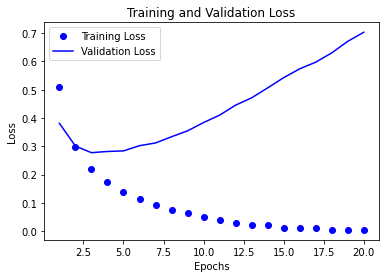

In [13]:
# Plotting the training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

num_epochs = 20 # as defined during training 

epochs = range(1, num_epochs + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

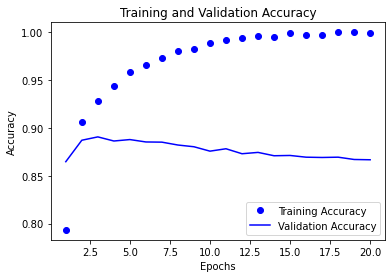

In [14]:
# Plotting the training and validation accuracy 

plt.clf() # used to clear the figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

OBSERVATIONS

The training loss decreased with every epoch, and the training accuracy increases with every epoch. That's what we expect when running optimization algorithms such as gradient-descent - the quantity we want to minimize, i.e. the cost function, should be less with every iterations.

This is not the case of the validation loss and accuracy: they seem to peak at the fourth epoch. This is a clear case of overfitting: after the second epoch, we are overoptimizing on the training data, and we end up learning representations that are specific to the training data and don't generlize to data outside of the training set. 

PREVENT OVERFITTING 

In this case, to prevent overfitting, we could stop training after three epochs (this is not necessarily the optimal choice).

In [15]:
# Retraining a model from scratch 
model_2 = keras.Sequential()
model_2.add(layers.Dense(16, input_shape = (10000,), activation = 'relu'))
model_2.add(layers.Dense(16, activation = 'relu'))
model_2.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
opt = keras.optimizers.RMSprop(learning_rate = 0.001)                                     # OPTIMIZER CHOICE
model_2.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])      # COMPILING THE MODEL CHOOSING THE LOSS/COST FUNCTION 

In [17]:
history_2 = model_2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4296 - accuracy: 0.8315
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2521 - accuracy: 0.9105
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1960 - accuracy: 0.9303
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1651 - accuracy: 0.9427


In [18]:
results = model_2.evaluate(x_test, y_test)

test_loss = results[0];
test_accuracy = results[1];

print(' ')
print('*** METRICS FOR THE TESTING SET ***')
print('The accuracy in predicting the testing set is %g %%' %(test_accuracy*100))
print('The loss in predicting the testing set is %g %%' %(test_loss*100))

782/782 [==============================] - 1s 2ms/step - loss: 0.2975 - accuracy: 0.8828
 
*** METRICS FOR THE TESTING SET ***
The accuracy in predicting the testing set is 88.284 %
The loss in predicting the testing set is 29.7513 %
